## Solutions
---

### Exercise 1 - Complex Numbers



> Calculate (analytically) real and imaginary part and the absolute value of the following complex numbers
$$
(a)\,z_1 = \frac{2}{1-2i} \qquad
(b)\,z_2 =  \frac{1-i}{1+i}
$$

> Via Python/Numpy calculate the Euler representation $z=|z|e^{i\phi}$ and plot both complex numbers in the complex plane.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

################
# Your Code Here
################

z1 = 2/(1-2j)
z2 = (1-1j)/(1+1j)
np.abs(z1)
np.rad2deg(np.angle(z1))
plt.scatter(z1.real,z1.imag)
plt.scatter(z2.real,z2.imag)
plt.axis([-2,2,-2,2])
plt.grid()
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')

Text(0, 0.5, 'Im(z)')

### Exercise 2 - Fourier Series

Consider the $T$-periodic function
$$
f(t) = \begin{cases} 
1 & \frac{T}{4}\leq t \leq \frac{3T}{4} \\
0 & \mathrm{sonst}
\end{cases}
$$
> Using Python/Sympy find the complex Fourier coefficients $c_n$ via
$$
c_n = \frac{1}{T}\int_0^T f(t)e^{-i\frac{2\pi}{T}nt}\mathrm{d}t
$$
using $T=10$.
To this end use `integrate()` (https://docs.sympy.org/latest/modules/integrals/integrals.html ).

> Plot $|c_n|$ for $-N\leq n\leq N$ and 
$$
f_N(t) = \sum_{n=-N}^Nc_n e^{i\frac{2\pi}{T}nt}
$$

/home/jupyter-holger/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


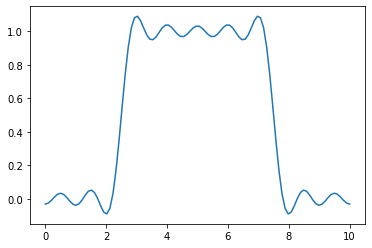

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in subtract


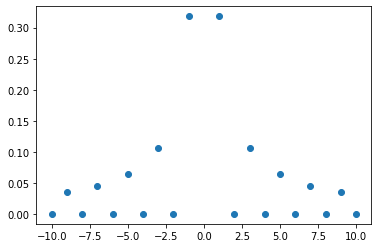

In [12]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)
t = Symbol('t')
n = Symbol('n', positive=True)

################
# Your Code Here
################


T = 10
c0 = 0.5
c = 1/T*integrate(exp(-1j*2*pi/T*n*t), (t,T/4,3*T/4))
c = lambdify(n,c,'numpy')

t = np.linspace(0,T,100)
f = np.ones(t.shape,dtype=complex)*c0
N = 10
for n in range(-N,N+1):
    if n!=0:
        f+=c(n)*np.exp(1j*2*np.pi/T*n*t)
plt.plot(t,f)
plt.show()
plt.plot(np.arange(-N,N+1,1),np.abs(c(np.arange(-N,N+1,1))),'o')

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in true_divide
<string>:2: RuntimeWarning: invalid value encountered in subtract


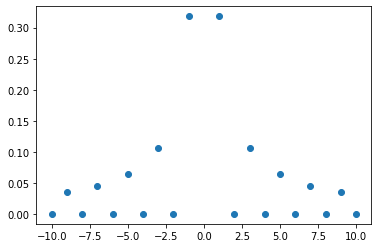

In [11]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)
t = Symbol('t')
n = Symbol('n', positive=True)

################
# Your Code Here
################


T = 10
c0 = 0.5
c = 1/T*integrate(exp(-1j*2*pi/T*n*t), (t,T/4,3*T/4))
c = lambdify(n,c,'numpy')
N = 10
plt.plot(np.arange(-N,N+1,1),np.abs(c(np.arange(-N,N+1,1))),'o')

### Exercise 3 - Ordinary Differential Equations

Consider the following initial value problem 
$$
f''(t)+0.1\,f(t)+f(t) = 0,\qquad f'(0) = 0,\, f(0) = 1
$$
> Analytically find the general solution to this differential equation. 

> Via python find the solution to the initial value problem and plot the result. To this end use `dsolve()` (https://docs.sympy.org/latest/modules/solvers/ode.html ).

In [18]:
f = Function('f')
t = Symbol('t')

eq = f(t).diff(t,2) + 0.1*f(t).diff(t) + f(t)
f = dsolve(eq,f(t),ics={f(0) : 1, f(t).diff(t,1).subs(t,0) : 0 })
f = lambdify(t,f.rhs,'numpy')


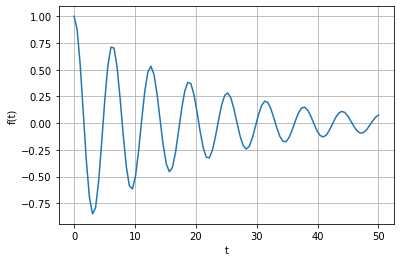

In [19]:
t = np.linspace(0,50,100)
plt.plot(t,f(t))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()